In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_cleaned = pd.read_csv('cleaned_dataset.csv')

target_column = 'Prediction'

# Split the dataset into features (X) and target variable (y)
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.97
Confusion Matrix:
 [[720  19]
 [  8 288]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       739
           1       0.94      0.97      0.96       296

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



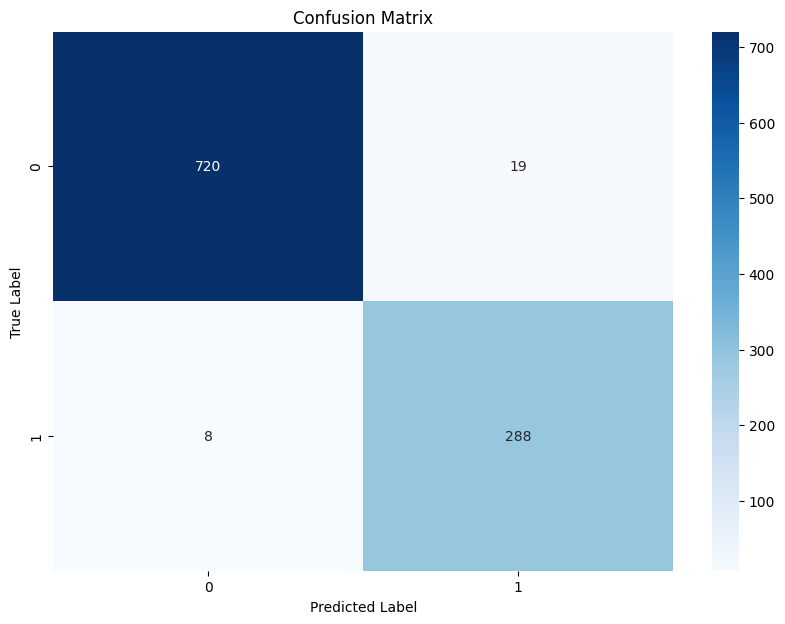

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

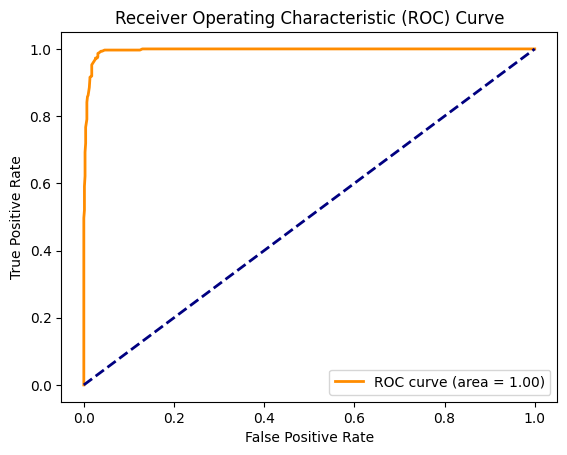

In [3]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

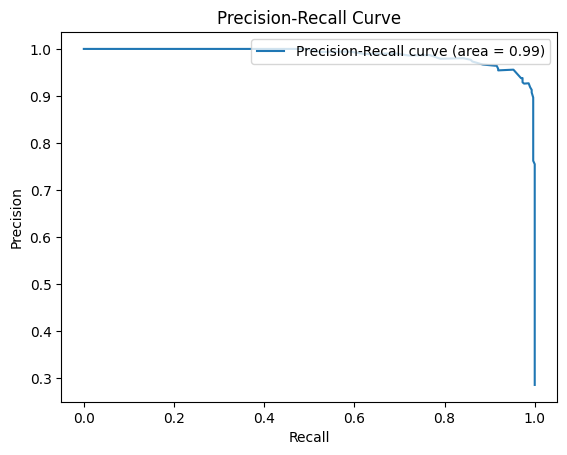

In [4]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, label=f'Precision-Recall curve (area = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

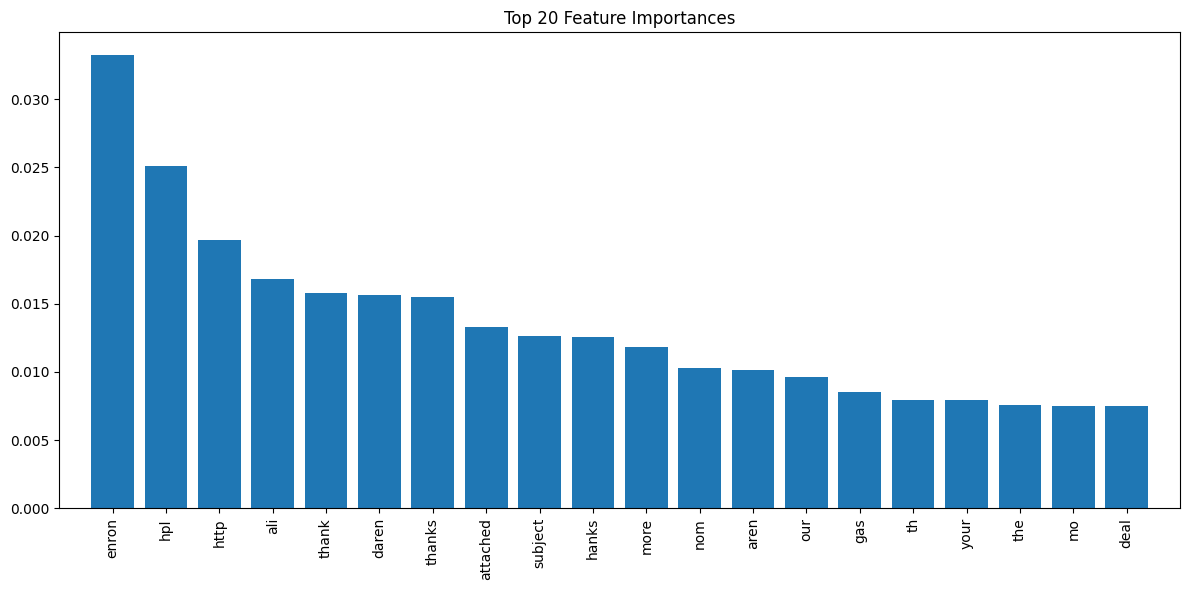

In [5]:
import numpy as np
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

importances = clf.feature_importances_
# Get the indices of the top 20 features
indices = np.argsort(importances)[-20:]
# Arrange them in descending order
sorted_indices = indices[::-1]

# Plot the top 20 feature importances
plt.figure(figsize=(12, 6))
plt.title('Top 20 Feature Importances')
plt.bar(range(len(sorted_indices)), importances[sorted_indices], align="center")
plt.xticks(range(len(sorted_indices)), X.columns[sorted_indices], rotation=90)
plt.xlim([-1, len(sorted_indices)])
plt.tight_layout()
plt.show()

### Setup for Web Frontend

In [6]:
import pickle
pickle.dump(clf, open('models/random_forest_model.pkl', 'wb'))

def preprocess_input_string(input_string, columns):
    # Tokenize the input string and count the occurrence of each word
    word_list = input_string.lower().split()
    word_count = {word: word_list.count(word) for word in word_list}

    # Create a DataFrame with zeros for all columns
    input_df = pd.DataFrame(columns=columns)
    input_df.loc[0] = [0] * len(columns)

    # Update the DataFrame with word counts from the input string
    for word in word_count:
        if word in input_df.columns:
            input_df.at[0, word] = word_count[word]

    return input_df

def predict_string(input_string):
    # Load the trained model
    loaded_model = pickle.load(open('models/random_forest_model.pkl', 'rb'))

    # Preprocess the input string to match the dataset's format
    processed_input_df = preprocess_input_string(input_string, X_train.columns)

    # Make a prediction using predict_proba
    probabilities = loaded_model.predict_proba(processed_input_df)

    # Extract the probability of the positive class
    positive_class_probability = probabilities[0][1]
    return positive_class_probability

In [7]:
# expect gary may's email to have a really low probability of being spam
test_string = "Welcome Aggies! We are excited to welcome both new and continuing students to campus and the community. We wish you a safe and productive school year filled with academic and personal success. UC Davis has many important health and safety resources, so please take time to review this information in case you ever need to access them. Mental Health Resources Aggie Mental Health is a campuswide initiative supporting student mental health and well-being. This campaign is a collaboration between Student Health and Counseling Services’ (SHCS) Health Education and Promotion department and the Aggie Mental Health Ambassador program. Visit the Aggie Mental Health website for help navigating all of campus's many mental health resources, including Counseling Services. You can also follow the Aggie Mental Health Instagram for up to date information about mental health resources on campus. Alcohol, Tobacco and Other Drugs Risk Reduction SHCS’ Health Education and Promotion department offers tips and resources around alcohol and other substances. The Safe Party website and Instagram account (@ucdsafeparty) feature information around: Signs of alcohol poisoning and other overdose resources, including how to obtain Narcan on campus if you are concerned about a friend’s opioid use Navigating consent while drinking and other sexual well-being resources How to be an ‘Upstander’ and/or Effective Wingperson To remove the fear of getting into trouble that may keep students from calling for medical help in an emergency related to alcohol or drugs, UC Davis has the Aggies Act protocol where neither the student who called nor the student who experienced the medical emergency would be subject to the formal student conduct process. A similar law exists in the state of California for students who live off campus. For any students in recovery from alcohol or other substances, UC Davis has a collegiate recovery group, Aggies For Recovery. Find out more on our SHCS recovery resources page. Harassment and Discrimination UC Davis takes all complaints of harassment and discrimination very seriously. The Harassment & Discrimination Assistance and Prevention Program (HDAPP) handles all reports of harassment and discrimination including reports of sexual violence and sexual harassment and can answer any questions you have about how the University responds to such concerns. If you or someone you know experienced harassment or discrimination at UC Davis, please report it here. Sexual Violence Resources If you or someone you know is experiencing sexual violence, including sexual assault, sexual harassment, sexual exploitation, intimate partner violence, stalking or harassment based on gender identity or sexual orientation, there are professional and experienced staff available to support and help you understand your rights and options. All of the confidential resources below are free of cost and available to survivors regardless of their decision to make any formal report. The confidential CARE Advocates provide crisis intervention and advocacy, assist with safety planning and discuss reporting options. They can be reached by calling (530) 752-3299. For non-urgent situations, you can email ucdcare@ucdavis.edu. UC Davis Counseling Services offers confidential short-term counseling to any student experiencing stress or trauma related to a variety of situations. To schedule a counseling appointment, call (530) 752-0871. The Women's Resources and Research Center (WRRC), Lesbian, Gay, Bisexual, Transgender, Queer, Intersex, Asexual Resource Center (LGBTQIA RC) and Ombuds are also designated as confidential resources for survivors of sexual violence. Hazing Resources Stop Hazing is a campuswide campaign developed to provide support and resources for students who are being hazed, empower our community to identify, report and discourage hazing and offer ideas of how to implement positive strategies to bring groups together. The campaign includes the new Stop Hazing website serving as hub for educational resources. Working together, our goal is to create the best environment for our students, faculty, staff and other community residents. We also encourage you to reach out to any of these resources if you ever need support during your time at UC Davis. In health, Cory Vu Associate Vice Chancellor for Health, Wellness and Divisional Resources Division of Student Affairs Raeann Bowlds Director, Health Education and Promotion UC Davis Student Health and Counseling Services "
probability = predict_string(test_string)
print("Probability of being positive spam:", probability)

Probability of being positive spam: 0.54
